In [91]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [92]:
df_raw = loadmat('mnist-original.mat')

In [93]:
df = {"data": df_raw['data'].T, "target": df_raw['label'][0]}

In [94]:
x_train, x_test, y_train, y_test = train_test_split(df['data'], df['target'], test_size=0.2, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(56000, 784) (56000,)
(14000, 784) (14000,)


In [95]:
pca = PCA(0.80)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape)
print(x_test_pca.shape)

(56000, 43)
(14000, 43)


In [103]:
result = pca.inverse_transform(x_train_pca)
components = pca.n_components_

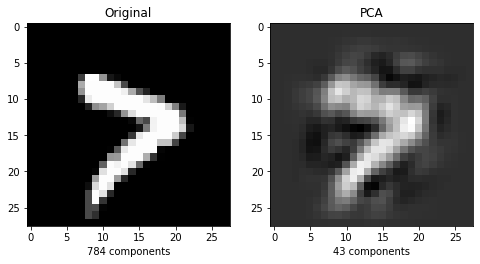

In [104]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_train[0].reshape(28,28), cmap=plt.cm.gray, interpolation='nearest')
plt.xlabel('784 components')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(result[0].reshape(28,28), cmap=plt.cm.gray, interpolation='nearest')
plt.xlabel(str(components)+' components')
plt.title('PCA')
plt.show()